# HW1

Following code is written in Julia, which is very close to Matlab when it comes to vector processing.

## Numerical Derivatives

Functions `dfdx` and `df2dx2` take a function of a single variable and delta x and create a numerical first and second derivative functions.

The first derivative of `sin` is `cos`. Second derivative is `-sin`. Analytical derivatives are plotted with higher number of points. Numerical approximations are using `N = 5, 10, 20, 1000` points. The `dx` is set to `2*pi/N`.

The numerical approximations approach analytical as `N` grows larger. The error are especially significant around plot edges where there are not enough points to compute derivatives correctly.


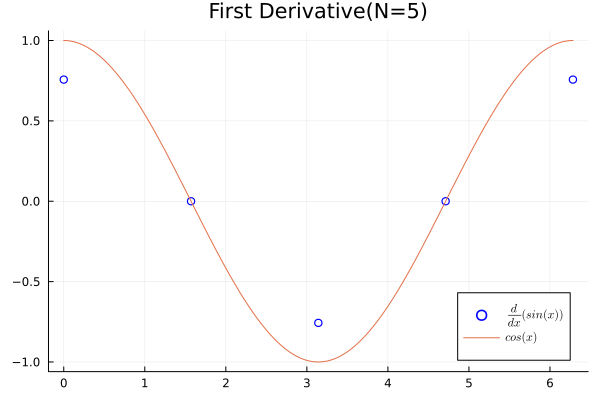

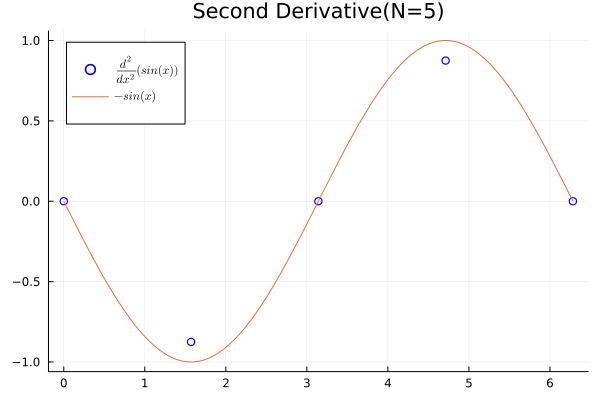

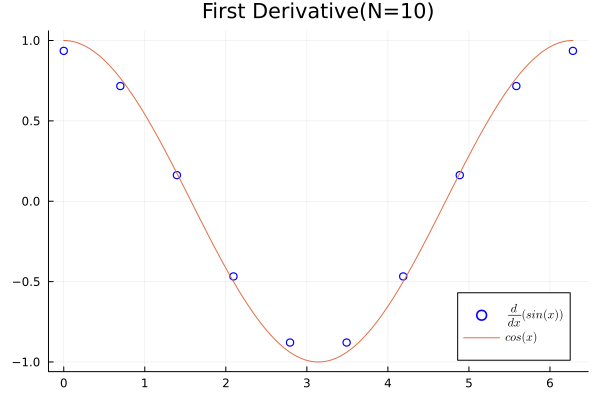

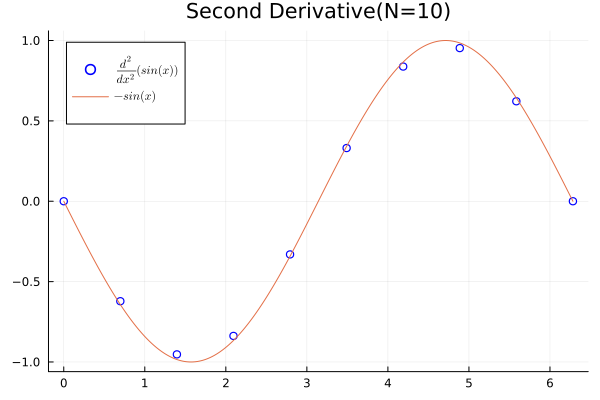

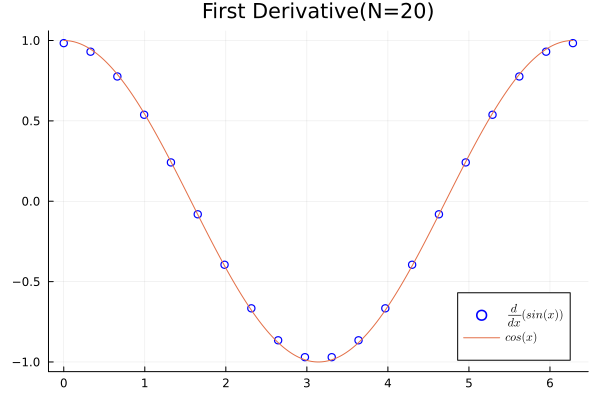

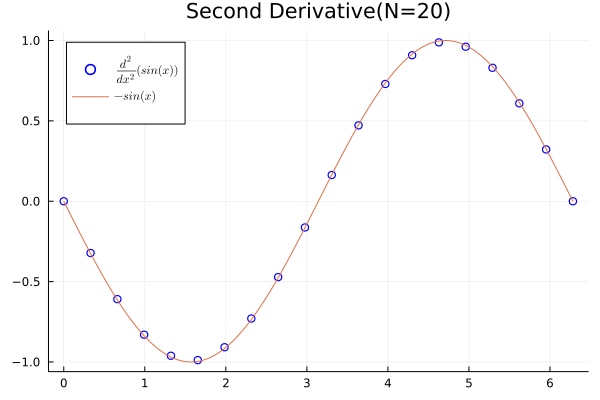

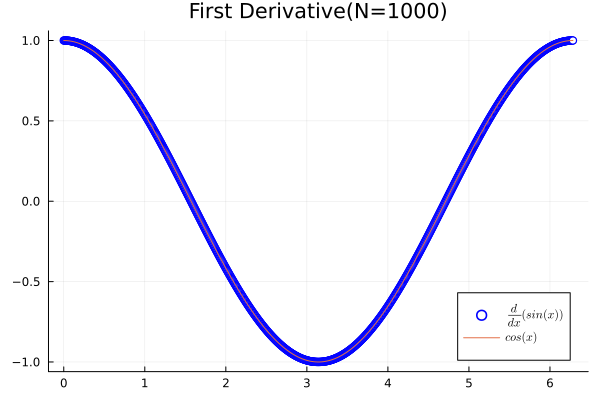

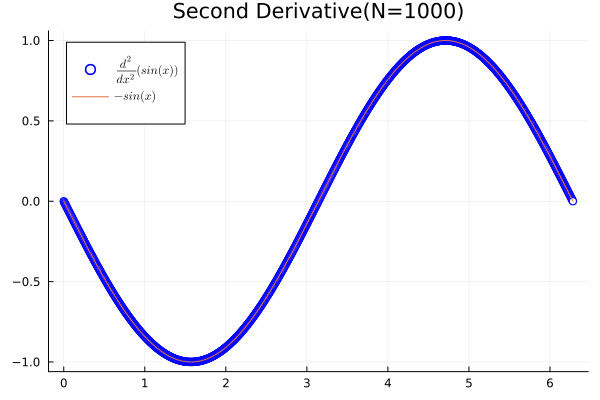

In [12]:
using Plots
using LaTeXStrings

function dfdx(x, f, dx)
    (f(x+dx) - f(x-dx))/(2*dx)
end

function df2dx2(x, f, dx)
    (f(x+dx) - 2*f(x) + f(x-dx))/(dx^2)
end

N=10

for N in [5,10,20,1000] 
    
    sin_dxdy(x) = dfdx(x,sin, 2*pi/N)

    sin_dx2dy2(x) = df2dx2(x,sin, 2*pi/N)

    x1 = range(0, 2*pi, length=N)

    x2 = range(0, 2*pi, length=1000)

    # First derivative plot
    p1 = plot(
        x1,
        [sin_dxdy.(x1)],
        title = string("First Derivative(N=",N,")"),
        label = L"\frac{d}{dx}(sin(x))",
        seriestype = :scatter,
        marker = :circle,
        markercolor = RGBA(1,1,1,0),   # or :none
        markerstrokecolor = :blue,
        markerstrokewidth = 1.5)

    plot!(
    x2,
    [cos.(x2)];
    title = string("First Derivative(N=",N,")"),
    label = L"cos(x)")

    # Second derivative plot
    p2 = plot(
        x1,
        [sin_dx2dy2.(x1)];
        title = string("Second Derivative(N=",N,")"),
        label = L"\frac{d^2}{dx^2}(sin(x))",
        seriestype = :scatter,
        marker = :circle,
        markercolor = RGBA(1,1,1,0),   # or :none
        markerstrokecolor = :blue,
        markerstrokewidth = 1.5)

    plot!(
    x2,
    [-sin.(x2)];
    title = string("Second Derivative(N=",N,")"),
    label = L"-sin(x)")

    display(p1)
    display(p2)

end
    

## Numerican Derivatives of Discontinious Functions

A rect function is multiplied with a sin function. I then compute the first and second derivatives numerically. Technically, the analytical derivative is not defined at discontinious points created by the rect function. The numerical derivative approaches inifinity if I keep increasing `N`. In practice, it simply becomes a large number, which seems to be bound for each value `dx`. Smaller `dx` causes a larger jump in derivatives.

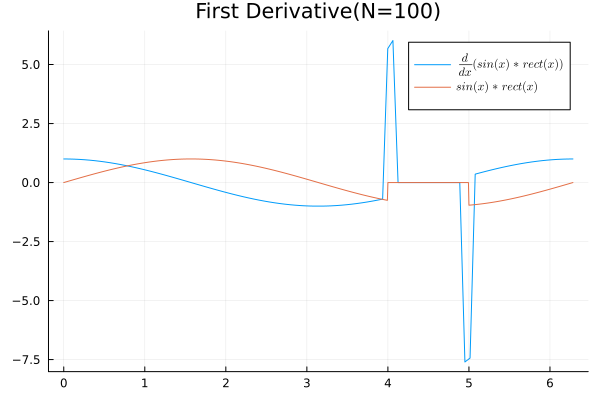

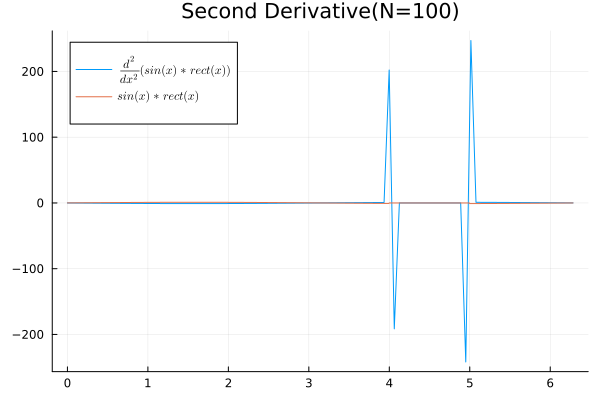

In [5]:
using Plots
using LaTeXStrings

rect(x) = abs(x) >= 4 && abs(x) ≤ 5 ? 0.0 : 1.0

function dfdx(x, f, dx)
    (f(x+dx) - f(x-dx))/(2*dx)
end

function df2dx2(x, f, dx)
    (f(x+dx) - 2*f(x) + f(x-dx))/(dx^2)
end

N=100


sin_dxdy(x) = dfdx(x,sin, 2*pi/N)

sin_dx2dy2(x) = df2dx2(x,sin, 2*pi/N)

x1 = range(0, 2*pi, length=N)

x2 = range(0, 2*pi, length=1000)

plot(x1, rect.(x1))

# First derivative plot
p1 = plot(
    x1,
    [(x -> dfdx(x, x-> sin(x)*rect(x), 2*pi/N)).(x1)],
    title = string("First Derivative(N=",N,")"),
    label = L"\frac{d}{dx}(sin(x)*rect(x))")

plot!(
x2,
[(x-> sin(x)*rect(x)).(x2)];
title = string("First Derivative(N=",N,")"),
label = L"sin(x)*rect(x)")

# Second derivative plot
p2 = plot(
    x1,
    [(x -> df2dx2(x, x-> sin(x)*rect(x), 2*pi/N)).(x1)],
    title = string("Second Derivative(N=",N,")"),
    label = L"\frac{d^2}{dx^2}(sin(x)*rect(x))")

plot!(
x2,
[(x-> sin(x)*rect(x)).(x2)];
title = string("Second Derivative(N=",N,")"),
label = L"sin(x)*rect(x)")

display(p1)
display(p2)

    



# Finite Difference Method

To solve the hollow conductor problem, I created a function that constructs a matrix row automatically for each node from an ASCII diagram of the conductor. The result is then another ASCII diagram with node voltages replaced by solved values.

In [11]:
struct V
    id::Int
end

# Hollow conductor diagram
M =
[100  100   100   0    100  100  100;
 0    V(1)  100   0    100  V(9)  0;
 0    V(2)  100   100  100  V(8)  0;
 0    V(3)  V(4)  V(5) V(6) V(7)  0;
 0    0     0     0    0    0     0;];


# Construct equation for a node
function node_equation(i,j)
    R = zeros(10)

    v = M[i, j]
    R[v.id] = -4

    v_t = M[i+1, j]
    v_d = M[i-1, j]
    v_l = M[i, j-1]
    v_r = M[i, j+1]

    for v in [v_t, v_d, v_l, v_r] 
        if typeof(v) == V
            R[v.id] = 1
        else
            R[10] -= v
        end
    end

    return R
end

# Build a matrix
A = [node_equation(2,2)';
     node_equation(3,2)';
     node_equation(4,2)';
     node_equation(4,3)';
     node_equation(4,4)';
     node_equation(4,5)';
     node_equation(4,6)';
     node_equation(3,6)';
     node_equation(2,6)';]

# Extract b from augmented matrix
b = A[:,10]
A = A[:,1:9]

x = A \ b

# Replace solutions into the diagram
map(v ->
    if typeof(v) == V
        x[v.id]
    else
        v
    end
, M)



5×7 Matrix{Real}:
 100  100       100        0       100      100       100
   0   61.4641  100        0       100       61.4641    0
   0   45.8564  100      100       100       45.8564    0
   0   21.9613   41.989   45.9945   41.989   21.9613    0
   0    0         0        0         0        0         0